# Power Law

In [30]:
import numpy as np
import matplotlib.pyplot as plt
#plt.xkcd()
plt.rcParams["font.family"] = "DejaVu Sans"
import numpy.random as rnd
%matplotlib inline

### Generating Power Law Distribution

So, the pdf of the power law distribution is $$ p(x) = Cx^{-\alpha}\text{, } $$ where $C$ is normalization constant and $\alpha>0$ is called as exponent of the distribution. 

From the lecture we know that (unless seminar starts before. If it is so, let's derive...)$$C = \frac{\alpha - 1}{x_{\text{min}}^{- \alpha + 1}}.$$ Let's try to generate power law random variable *(and pretend we don't know np.pareto() )*.

**EXERCISE 1** 

The first step is to derive cdf for powel law: $F(x) = P(X \leq x)$

$$ F(x) = 1 - \int_{x}^\infty p(t) dt$$

(here some random student goes to the whiteboard...)

**SOLUTION**

$$F(x) = 1 - (\frac{x}{x_\text{min}})^{ - \alpha + 1} $$

**EXERCISE 2**

If we define a random variable $R$, s.t. $R = F(X)$, then $R$ will be uniformly distributed on interval [0, 1].

Good thing here is that we easily can generate uniformly distributed pseudorandom numbers. Let's find an expression for $x = F^{-1}(r)$.

**SOLUTION**

\begin{equation}
x = (1 - r)^{\frac{-1}{\alpha - 1}} x_\text{min}
\end{equation}

**EXERCISE 3**

    1. Generate 10000 uniformly distributed pseudorandom numbers. Set alpha - 1 = 2.5 and x_min = 1
    2. Produce power law!
    3. Plot histogram of the results (instead of using plt.histogram() use np.histogram( ,bins = 5000 ))
    4. See something unpleasant?

In [31]:
# Write your code here..
#
#

# Generate uniform pseudorandom variables
r = rnd.random(10000)
alpha = 3.5
xmin = 1.0;

# Get power law!!!
x = (1 - r)**(-1.0/(alpha - 1)) * xmin
print(x.shape)



(10000,)


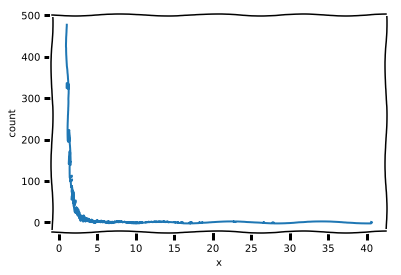

In [63]:
# Plot histogramm
yh, binEdges = np.histogram(x, bins=2000)
bincenters2 = 0.5*(binEdges[:-1]+binEdges[1:])
plt.plot(bincenters2,yh,'-',lw=2)
plt.ylabel('count')
plt.xlabel('x')

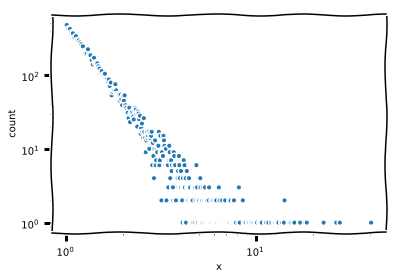

In [64]:
# That looks not good...
# Let's plot in log-log scale!

plt.loglog(bincenters2,yh,'.',lw=2)
plt.ylabel('count')
plt.xlabel('x')

## Exponent Estimation

**EXERCISE 4**

Given the results you've obtained in the previous section, try to estimate $\alpha$ via Linear Regression (don't forget to take $\log$)

In [37]:
? np.vstack

333
(333, 2)


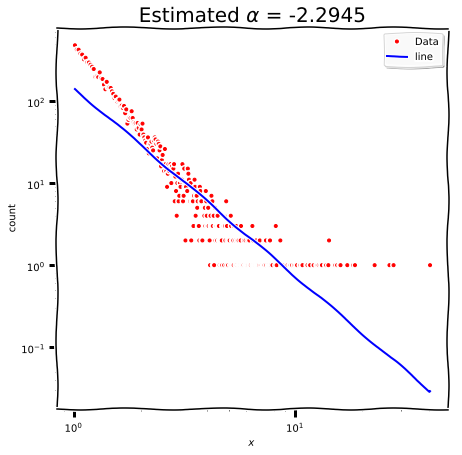

In [67]:
# Write your code here..
#
#

# Move zeros away
idx = np.ix_(yh != 0)
x_est = np.log(bincenters2[idx])
y_est = np.log(yh[idx])
s = len(x_est)
print( s)

#estimation
X = np.vstack([np.ones(s),x_est]).T
print(X.shape)

beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y_est)

# plt
idx = np.argsort(x_est)
yt = np.exp(X[idx,:].dot(beta))
xt = np.exp(X[idx,1])

fig,ax = plt.subplots()
fig.set_size_inches(7,7)
ax.loglog(bincenters2,yh,'.r',label='Data')
ax.loglog(xt,yt,'b',label='line')
plt.ylabel('count')
plt.xlabel('$x$')
ax.legend(loc='upper right',shadow=True)
plt.title('Estimated $\\alpha$ = {0:1.4f}'.format(beta[1]),fontsize=20)

Probably, you won't be satisfied with the results.. Btw, why?

Thankfully, there are some options to solve the problem:

    1. Exponential binning
    2. CDF estimation
    3. Likelyhood estimation
    
During the seminar we will work with 1 (and maybe 2).

**EXERCISE 5**

Perform exponential binning, that is, instead of using uniformal bins, spread them with log-scaling

** hint: use use *np.logspace()* **

[ 9.39884072 -2.43940012]


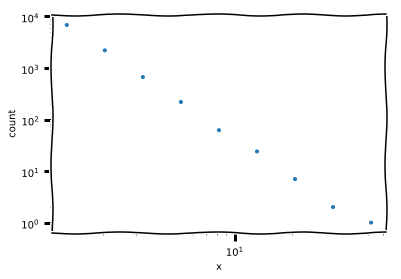

In [73]:
# Write your code here..
#
#

# Binning
bins = np.logspace(0,6,base = 2.0,num = 10)
exp_yh, exp_binEdges = np.histogram(x,bins)
exp_bincenters = 0.5*(exp_binEdges[1:]+exp_binEdges[:-1])

# plot
plt.loglog(bincenters,exp_yh,'.',lw=2)
plt.ylabel('count')
plt.xlabel('x')

# move zeros away
idx = np.ix_(exp_yh != 0)
x_est = np.log(exp_bincenters[idx])
y_est = np.log(exp_yh[idx])
s = len(x_est)

# Do estimation
X = np.vstack([np.ones(s), x_est]).T
Beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y_est)
print( Beta)



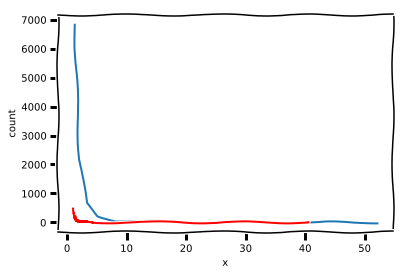

In [74]:
fig, ax = plt.subplots()



ax.plot(exp_bincenters,exp_yh,'-',lw=2)
ax.plot(bincenters2,yh,'r-',lw=2)
plt.ylabel('count')
plt.xlabel('x')